In [2]:
%cd tiny-roma-satelite-matching

/content/tiny-roma-satelite-matching


In [6]:
!pip install -r requirements.txt

Using cache found in /root/.cache/torch/hub/verlab_accelerated_features_main


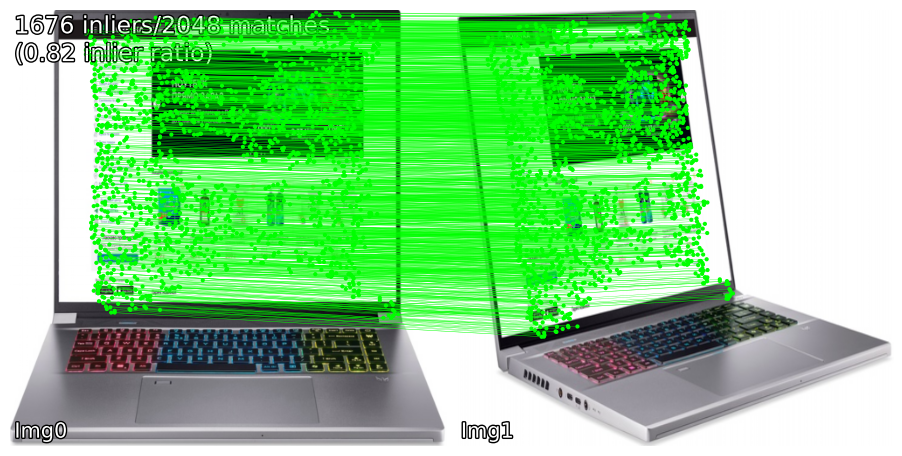

In [3]:
from match.viz import plot_matches
from match.roma_matcher import TinyRomaMatcher as tiny_matcher

import torch

ransac_kwargs = {'ransac_thresh':3,
                  'ransac_conf':0.999,
                  'ransac_iters':2000}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # 'cpu'
matcher = tiny_matcher()
img_size = 500  # optional

img0 = matcher.load_image('match/images/Note_f.jpg', resize=img_size)
img1 = matcher.load_image('match/images/Note_l.jpg', resize=img_size)

result = matcher(img0, img1)


plot_matches(img0, img1, result, show_matched_kpts=False, save_path='plot_matches.png')
